<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Gradient Boosting et GridSearch


## Les Données

<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/mushroom.jpg" width=400>

### MChasse aux champignons : Comestibles ou toxiques ?

Source des données : https://archive.ics.uci.edu/ml/datasets/Mushroom


Cet ensemble de données comprend des descriptions d'échantillons hypothétiques correspondant à 23 espèces de champignons à branchies de la famille Agaricus et Lepiota (pp. 500-525). Chaque espèce est identifiée comme certainement comestible, certainement toxique, ou de comestibilité inconnue et déconseillée. Cette dernière catégorie a été combinée avec celle des espèces toxiques. Le guide indique clairement qu'il n'existe pas de règle simple pour déterminer la comestibilité d'un champignon ; pas de règle du type "trois feuilles, qu'il en soit ainsi" pour le chêne et le lierre vénéneux.


Informations sur les attributs :

1. cap-shape : bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
2. cap-surface : fibrous=f, grooves=g, scaly=y, smooth=s
3. cap-color : brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
4. bruises? : bruises=t, no=f
5. odor : almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
6. gill-attachment : attached=a, descending=d, free=f, notched=n
7. gill-spacing : close=c, crowded=w, distant=d
8. gill-size : broad=b, narrow=n
9. gill-color : black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
10. stalk-shape : enlarging=e, tapering=t
11. stalk-root : bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
12. stalk-surface-above-ring : fibrous=f, scaly=y, silky=k, smooth=s
13. stalk-surface-below-ring : fibrous=f, scaly=y, silky=k, smooth=s
14. stalk-color-above-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
15. stalk-color-below-ring : brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
16. veil-type : partial=p, universal=u
17. veil-color : brown=n, orange=o, white=w, yellow=y
18. ring-number : none=n, one=o, two=t
19. ring-type : cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
20. spore-print-color : black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
21. population : abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
22. habitat : grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

## Importations

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("mushrooms.csv")

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Préparation des Données

In [5]:
X = df.drop('class', axis=1)

In [6]:
y = df['class']

In [7]:
X = pd.get_dummies(X, drop_first=True)

In [8]:
X.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

## Fractionnement Entraînement | Test

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

## Gradient Boosting et Grid Search avec Cross Validation

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
help(GradientBoostingClassifier)

Help on class GradientBoostingClassifier in module sklearn.ensemble._gb:

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for classification.
 |  
 |  This algorithm builds an additive model in a forward stage-wise fashion; it
 |  allows for the optimization of arbitrary differentiable loss functions. In
 |  each stage ``n_classes_`` regression trees are fit on the negative gradient
 |  of the loss function, e.g. binary or multiclass log loss. Binary
 |  classification is a special case where only a single regression

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {"n_estimators":[1,5,10,20,40,100], 'max_depth':[3,4,5,6]}

In [16]:
gb_model = GradientBoostingClassifier()

In [17]:
grid = GridSearchCV(gb_model, param_grid)

### Ajustement aux données d'entraînement avec SearchCV

In [18]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 20, 40, 100]})

In [19]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

## Performance 

In [20]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score

In [21]:
predictions = grid.predict(X_test)

In [22]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [24]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 4.57641624e-17, 0.00000000e+00, 0.00000000e+00,
       9.33548969e-17, 1.04524302e-03, 0.00000000e+00, 5.06011038e-06,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.15716901e-17,
       5.47066972e-17, 0.00000000e+00, 0.00000000e+00, 2.22085607e-08,
       2.31055039e-03, 5.38564819e-02, 1.84253604e-04, 1.38680732e-02,
       1.82499853e-02, 1.66884392e-05, 6.14744334e-01, 5.61116517e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.07820137e-02, 0.00000000e+00, 6.39630679e-17, 0.00000000e+00,
       3.98548715e-17, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.43226719e-16, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.39922283e-04, 4.13969676e-04, 1.36047590e-01, 3.02822984e-03,
       1.18531590e-02, 6.38988647e-04, 2.54703069e-03, 4.95063766e-06,
       1.83319493e-05, 0.00000000e+00, 5.43583166e-02, 3.14425049e-03,
       0.00000000e+00, 0.00000000e+00, 1.22682934e-03, 0.00000000e+00,
      

In [25]:
feat_import = grid.best_estimator_.feature_importances_

In [26]:
imp_feats = pd.DataFrame(index=X.columns, data=feat_import, columns=['Importance'])

In [27]:
imp_feats

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,4.576416e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,9.335490e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.116304e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [28]:
imp_feats.sort_values("Importance", ascending=False)

,Importance
odor_n,0.614744
stalk-root_c,0.136048
stalk-surface-below-ring_y,0.054358
bruises_t,0.053856
spore-print-color_r,0.030495
...,...
gill-attachment_f,0.000000
veil-color_o,0.000000
odor_y,0.000000
gill-color_w,0.000000


In [29]:
imp_feats.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Importance,95.0,0.010526,0.064724,0.0,0.0,2.220856e-08,0.000635,0.614744


In [30]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.000527]

In [31]:
imp_feats.sort_values('Importance')

,Importance
population_v,0.000631
stalk-surface-above-ring_k,0.000639
stalk-color-below-ring_w,0.000822
cap-surface_g,0.001045
stalk-color-above-ring_n,0.001227
cap-color_y,0.002311
population_c,0.002339
stalk-surface-above-ring_s,0.002547
stalk-color-below-ring_c,0.002558
stalk-color-below-ring_y,0.003023


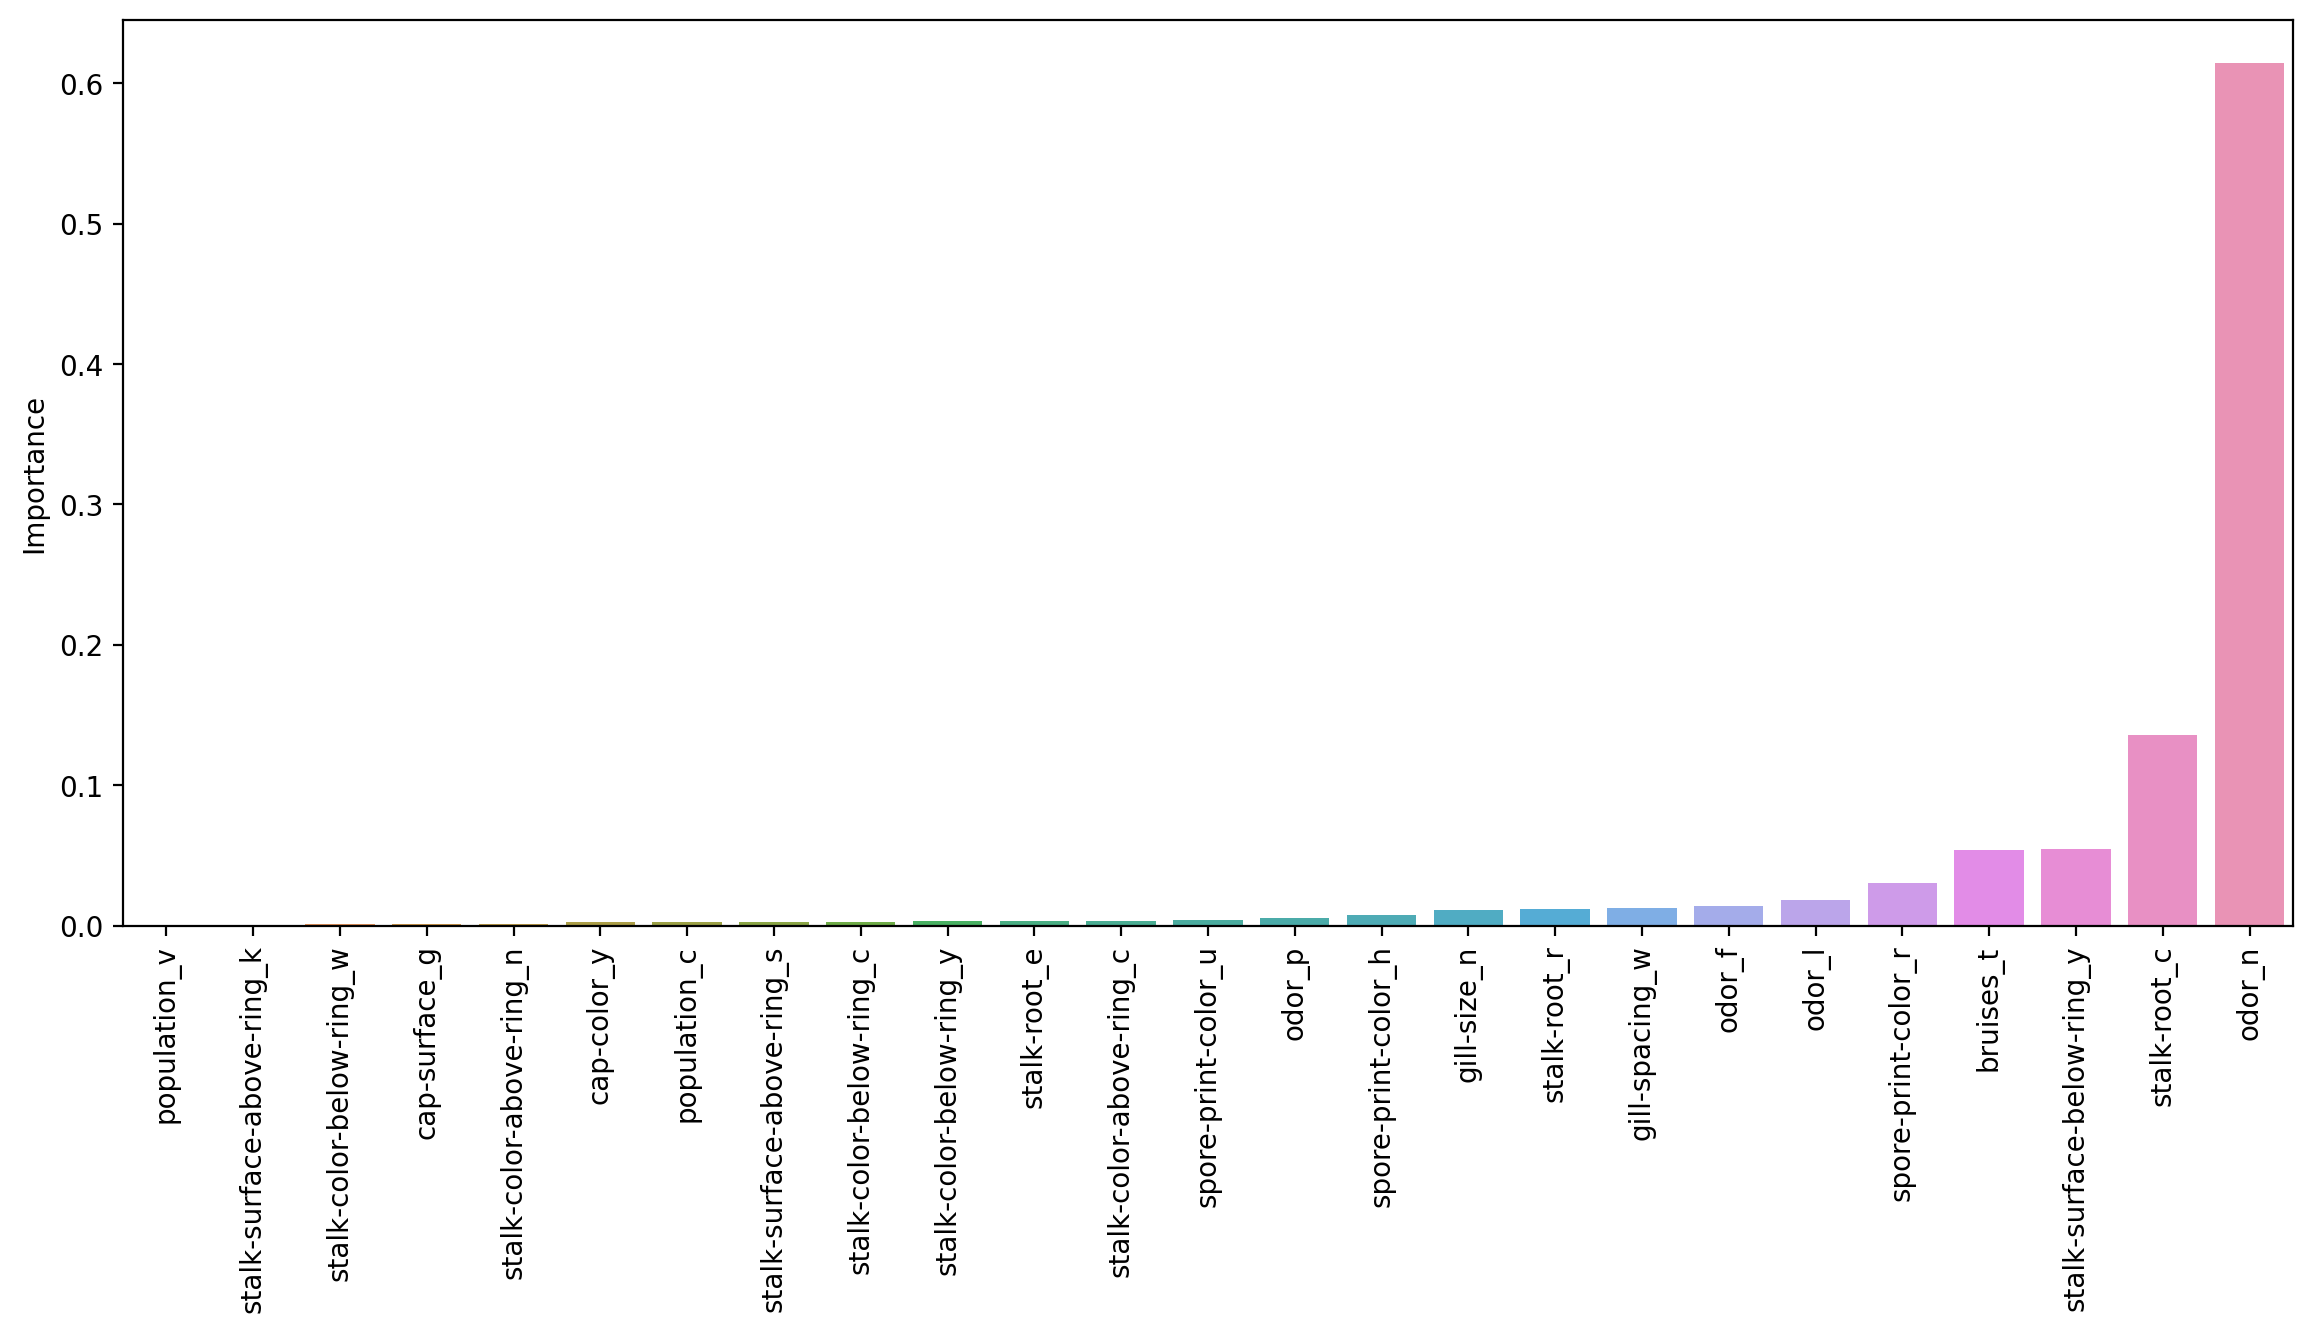

In [32]:
plt.figure(figsize=(14,6), dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'), x=imp_feats.sort_values('Importance').index,y='Importance')
plt.xticks(rotation=90);